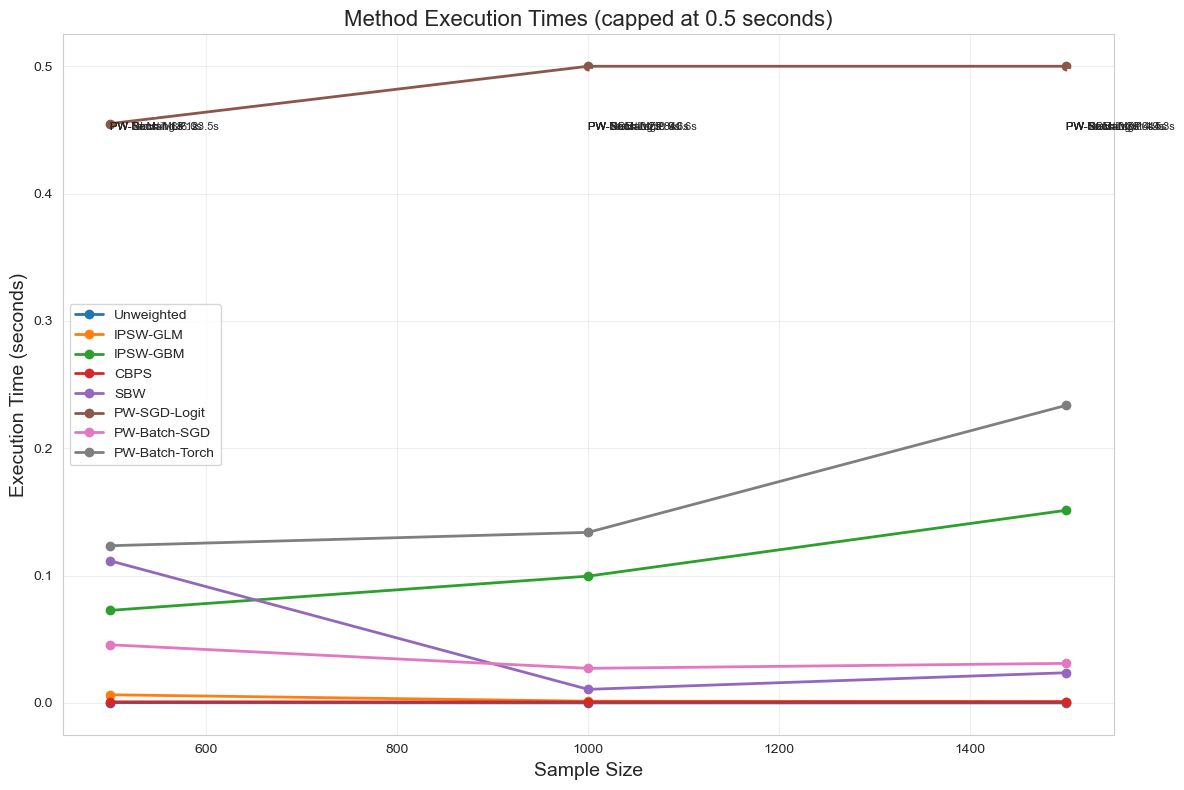

In [2]:
def plot_execution_times(results_file, max_time=20):
    """
    Create a plot of execution times with a restricted y-axis
    
    Parameters:
    -----------
    results_file: str
        Path to the pickle file with results
    max_time: float
        Maximum value for y-axis in seconds
    """
    import pickle
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Load results
    with open(results_file, 'rb') as f:
        results = pickle.load(f)
    
    # Extract binary treatment timings
    binary_timings = results['binary']['timings']
    sample_sizes = sorted(list(next(iter(binary_timings.values())).keys()))
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Plot each method
    for method, timings in binary_timings.items():
        # Skip methods with all times > max_time
        if all(t > max_time for t in timings.values()):
            continue
            
        times = [min(timings[size], max_time) for size in sample_sizes]
        plt.plot(sample_sizes, times, marker='o', linewidth=2, label=method)
    
    # Add annotations for truncated values
    for method, timings in binary_timings.items():
        for size in sample_sizes:
            if timings[size] > max_time:
                plt.annotate(
                    f"{method}: {timings[size]:.1f}s", 
                    xy=(size, max_time), 
                    xytext=(size, max_time*0.9),
                    arrowprops=dict(arrowstyle='->'),
                    fontsize=8
                )
    
    plt.xlabel('Sample Size', fontsize=14)
    plt.ylabel('Execution Time (seconds)', fontsize=14)
    plt.title(f'Method Execution Times (capped at {max_time} seconds)', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig('tuning_results/execution_times_capped.png', dpi=300)
    plt.show()

# Use the function
plot_execution_times('tuning_results/simulation_results.pkl', max_time=0.5)